In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1303,2020-08-15,United Kingdom,315028.0,316367.0,46904.0,41357.0,-1339.0,5547.0
1304,2020-08-15,Germany,222711.0,222828.0,9235.0,9231.0,-117.0,4.0
1305,2020-08-15,Iran,340016.0,338825.0,19401.0,19331.0,1191.0,70.0
1306,2020-08-15,Turkey,246702.0,246861.0,5928.0,5934.0,-159.0,-6.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  5032.454892966361
RMSE =  18420.092912937595


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  290.11467889908255
RMSE =  705.1828877665544


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  31994.384
RMSE =  56794.07433343729
-- World performances for deaths --
MAE =  1569.624
RMSE =  1934.4081492797739


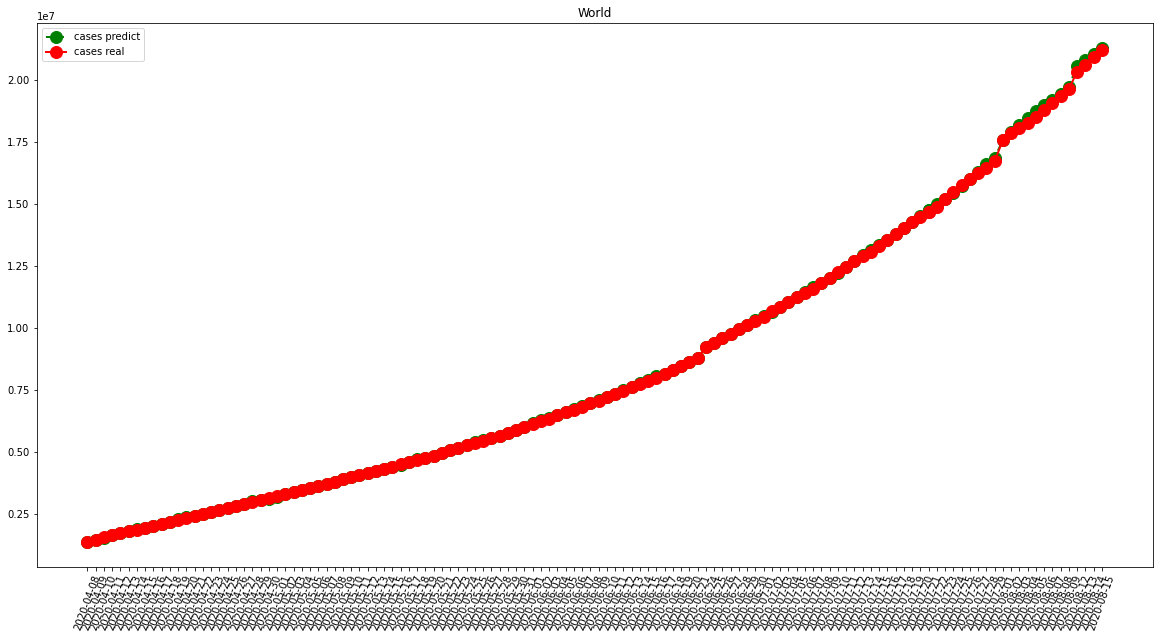

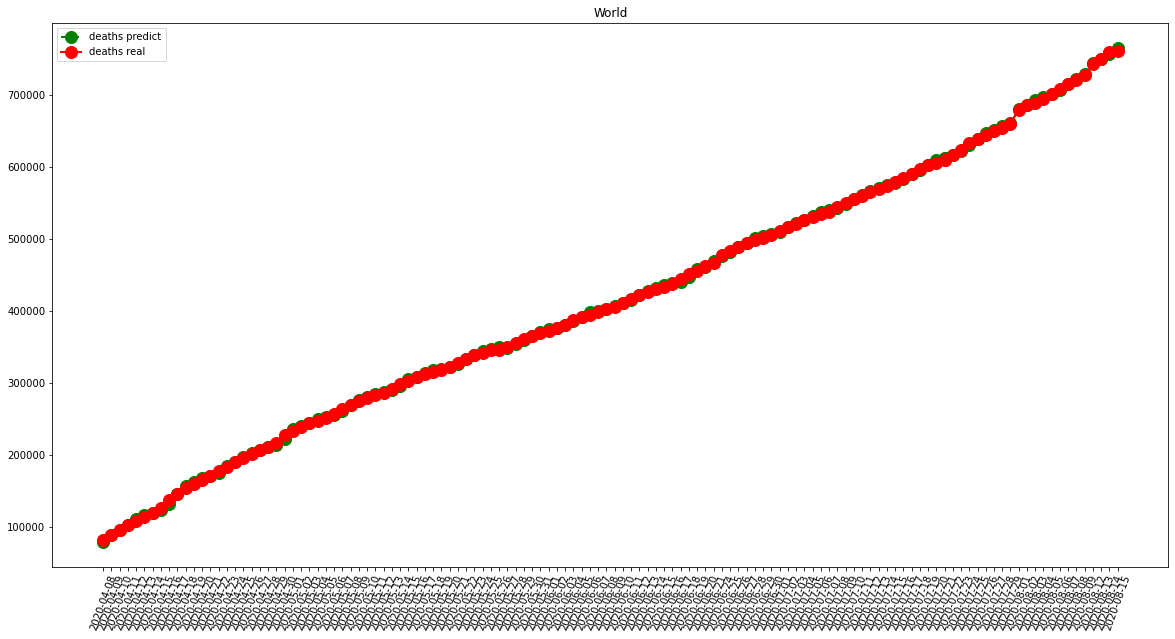

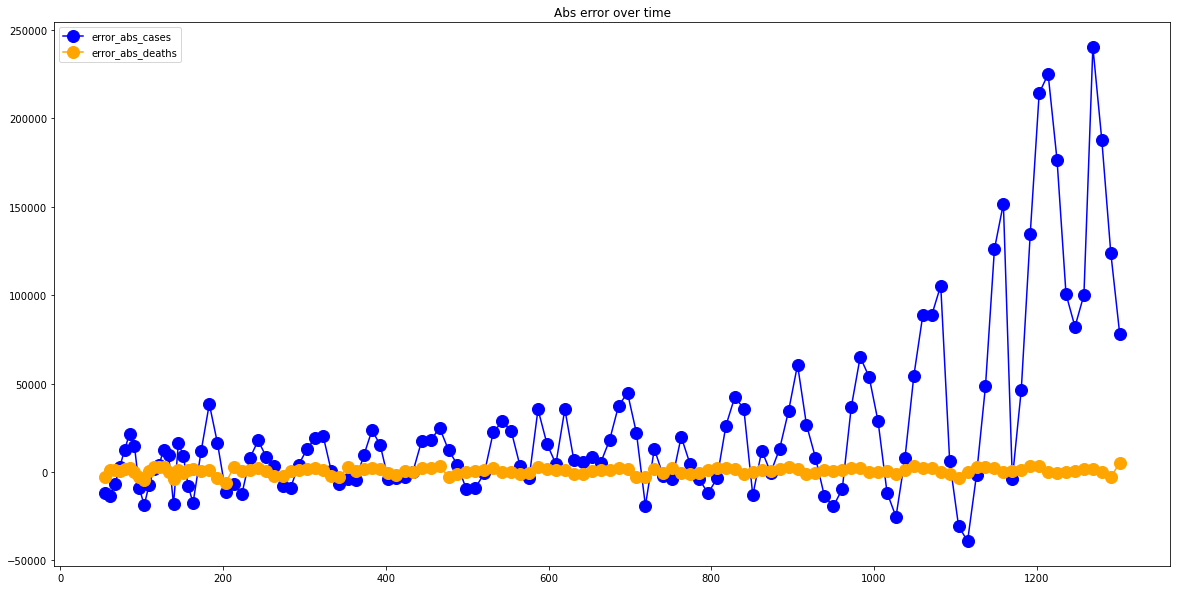

In [7]:
visShow("World")

-- France performances for cases --
MAE =  884.2518518518518
RMSE =  1369.6067237633501
-- France performances for deaths --
MAE =  135.73333333333332
RMSE =  288.54780719498984


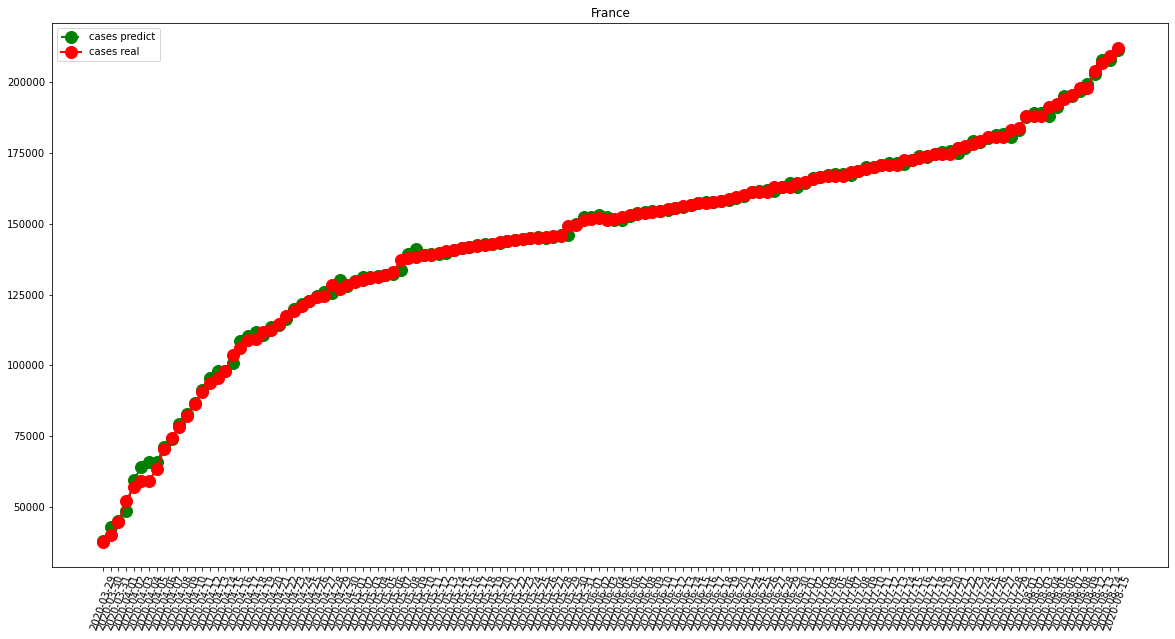

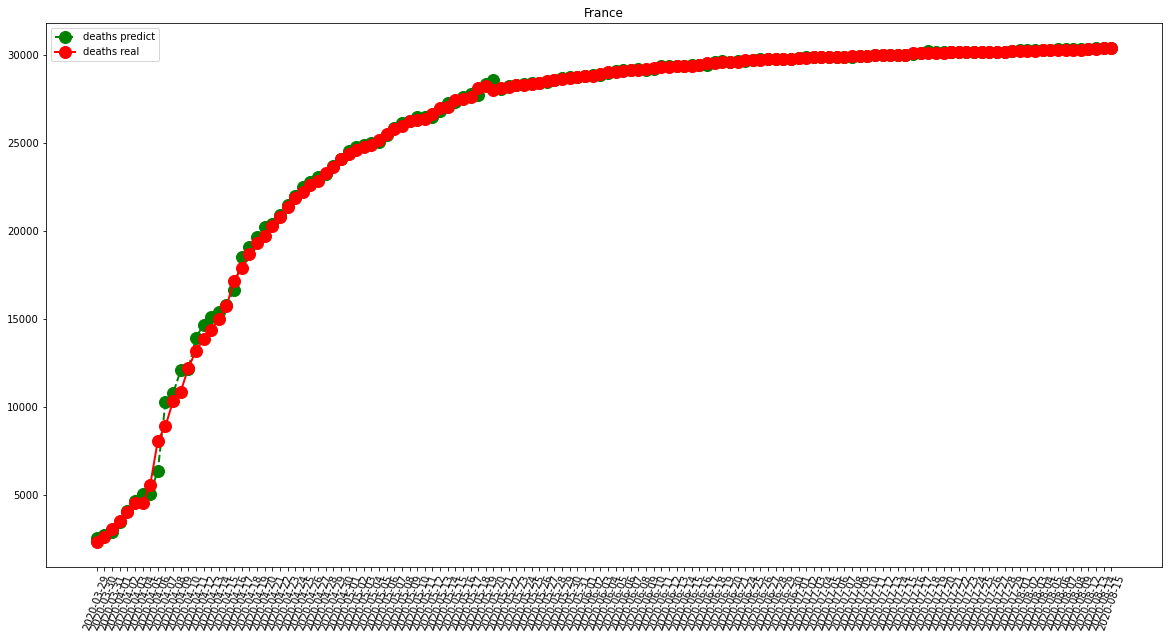

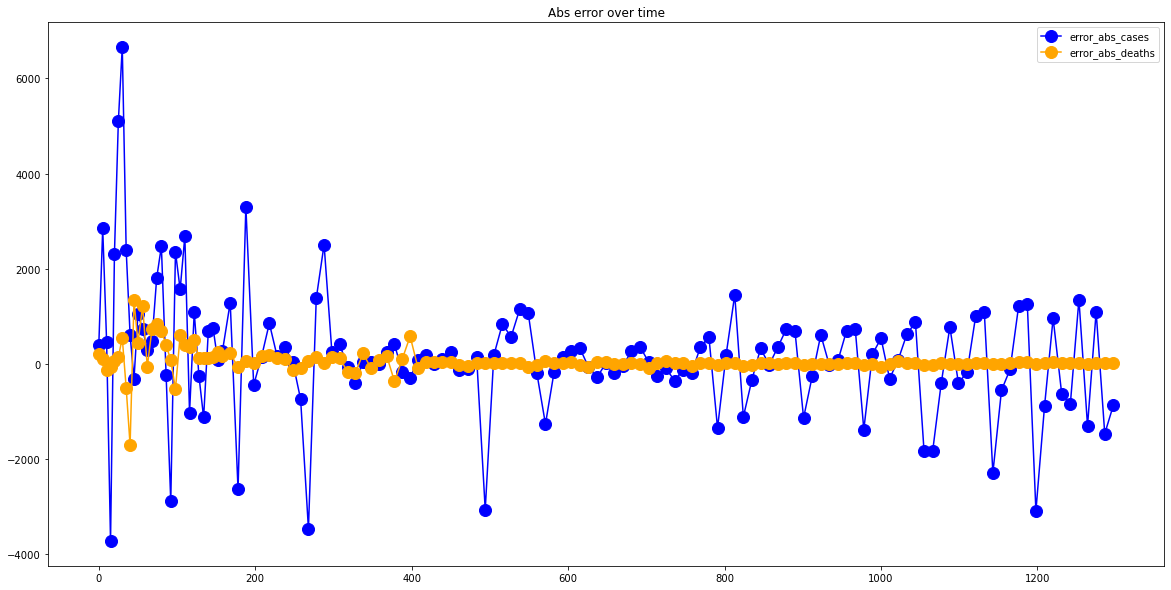

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  308.31851851851854
RMSE =  472.3405629494543
-- Italy performances for deaths --
MAE =  78.16296296296296
RMSE =  254.81005271174635


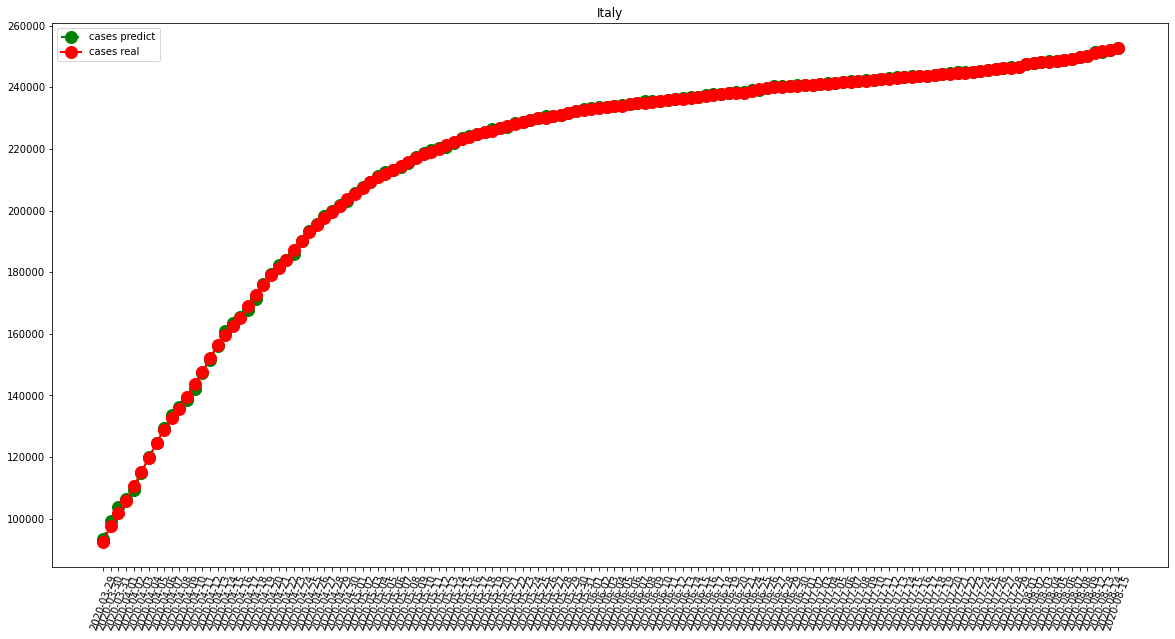

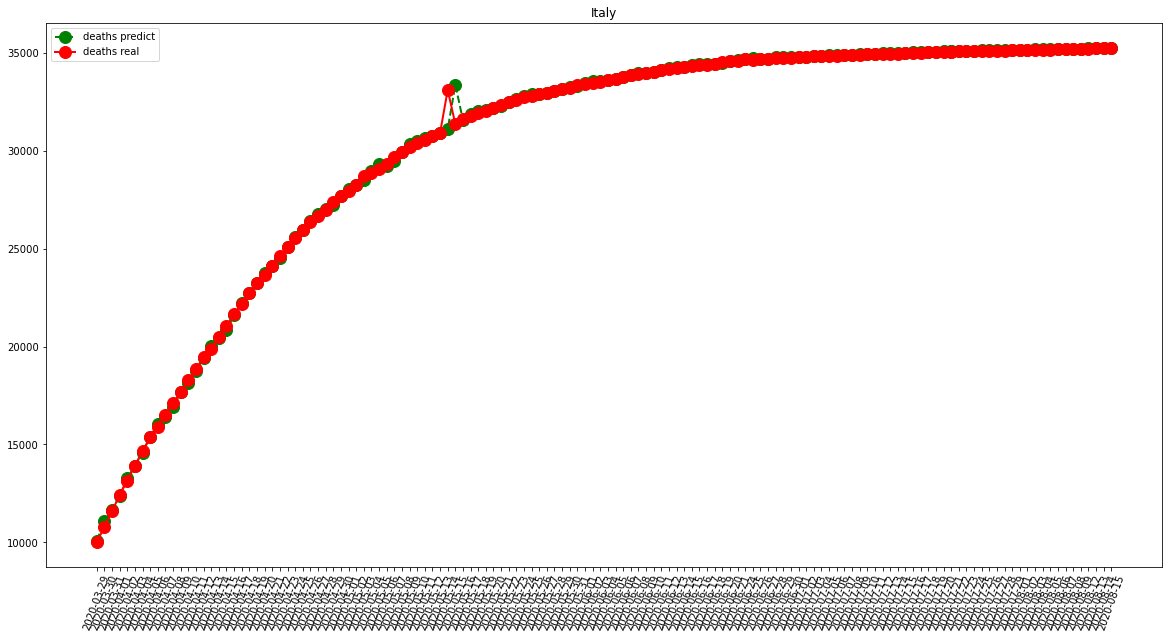

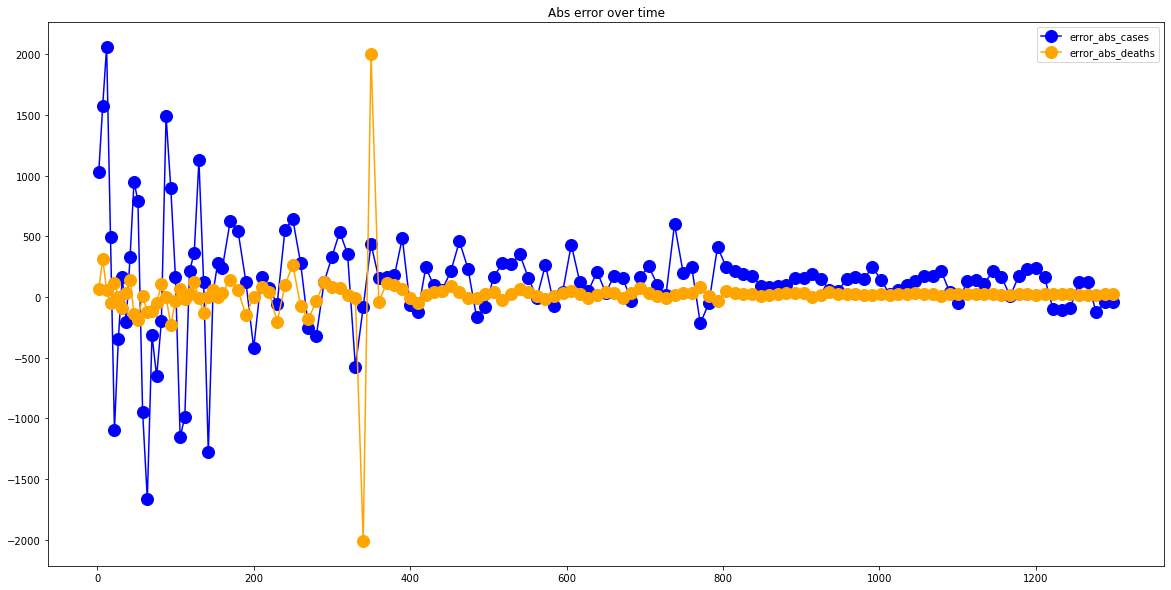

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1249.0296296296297
RMSE =  2340.53893920309
-- Spain performances for deaths --
MAE =  137.9925925925926
RMSE =  349.437230096877


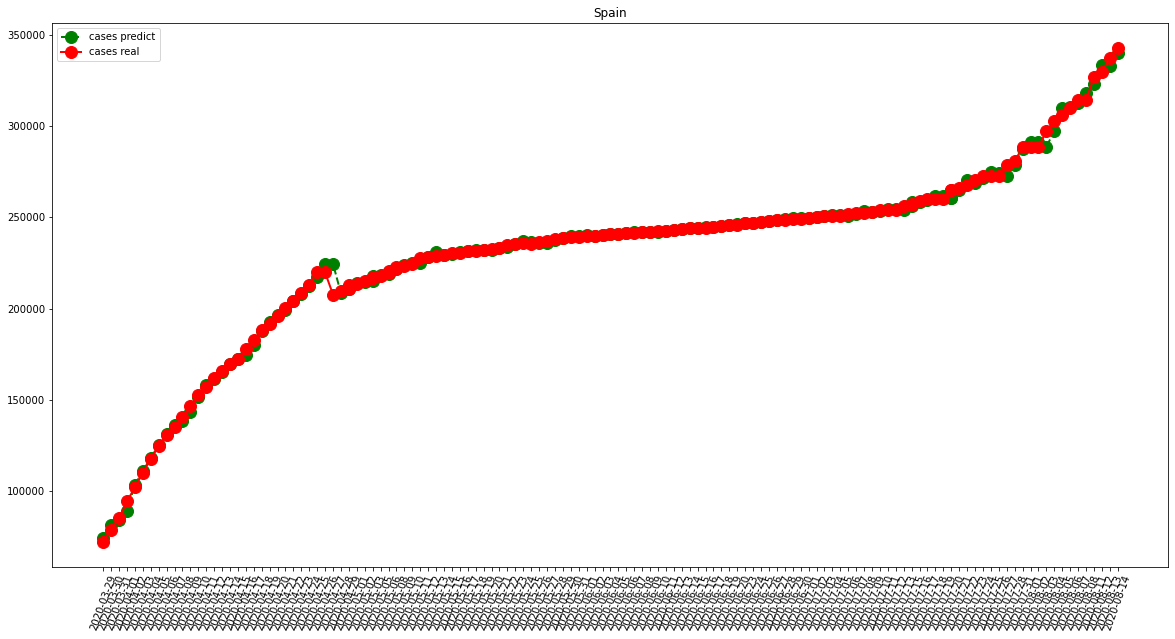

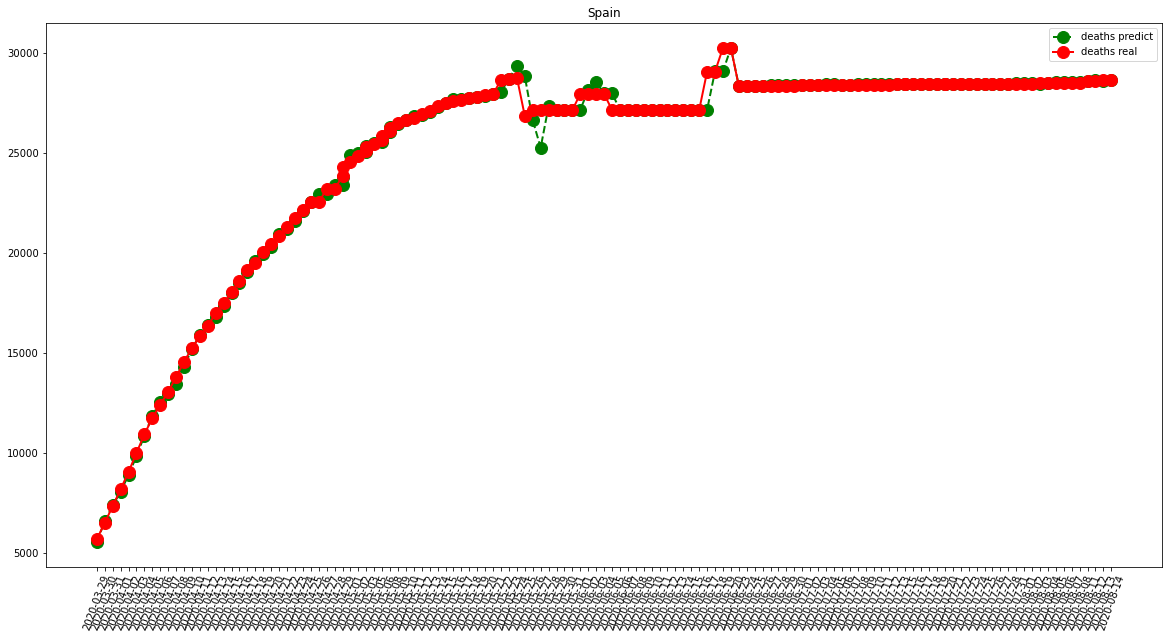

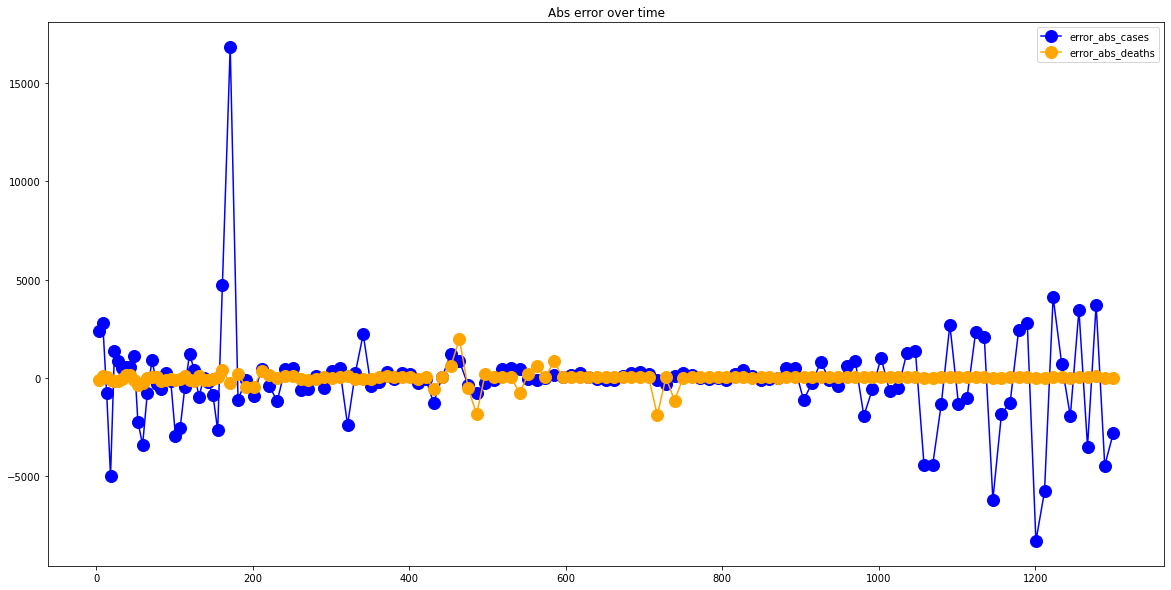

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  7890.481481481482
RMSE =  11672.813968076993
-- United States performances for deaths --
MAE =  495.93333333333334
RMSE =  711.6851415764845


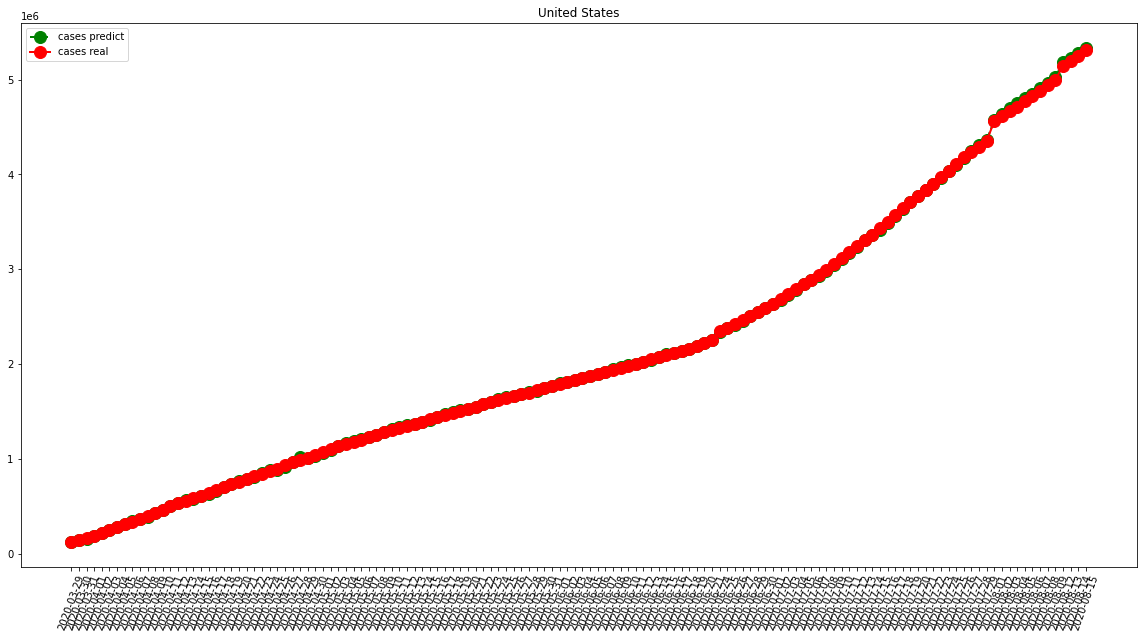

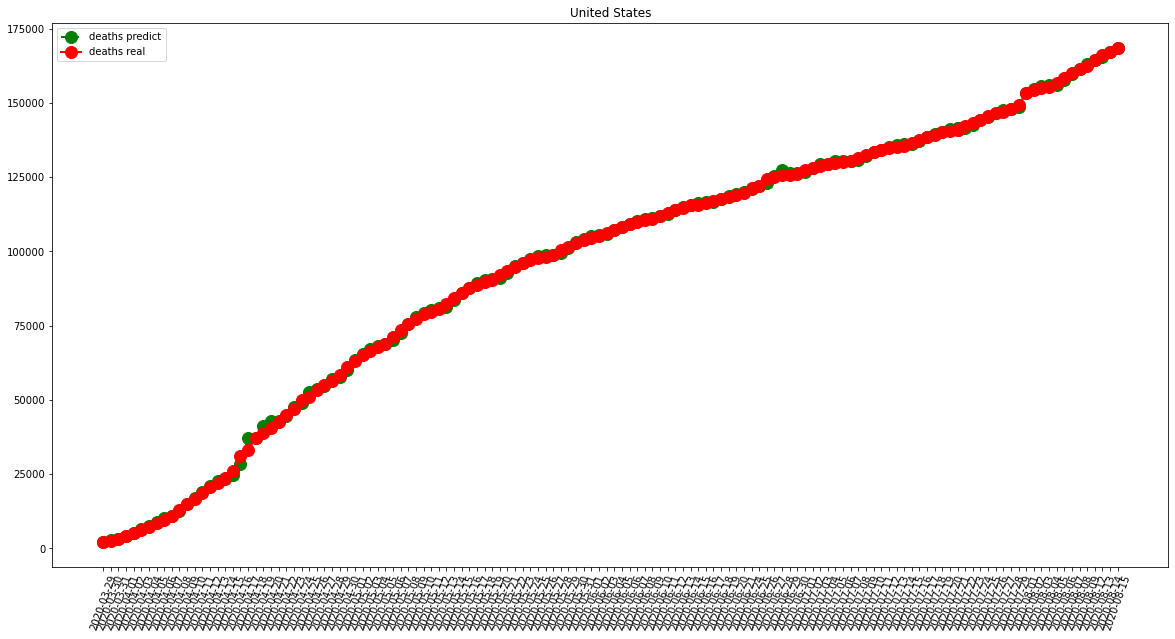

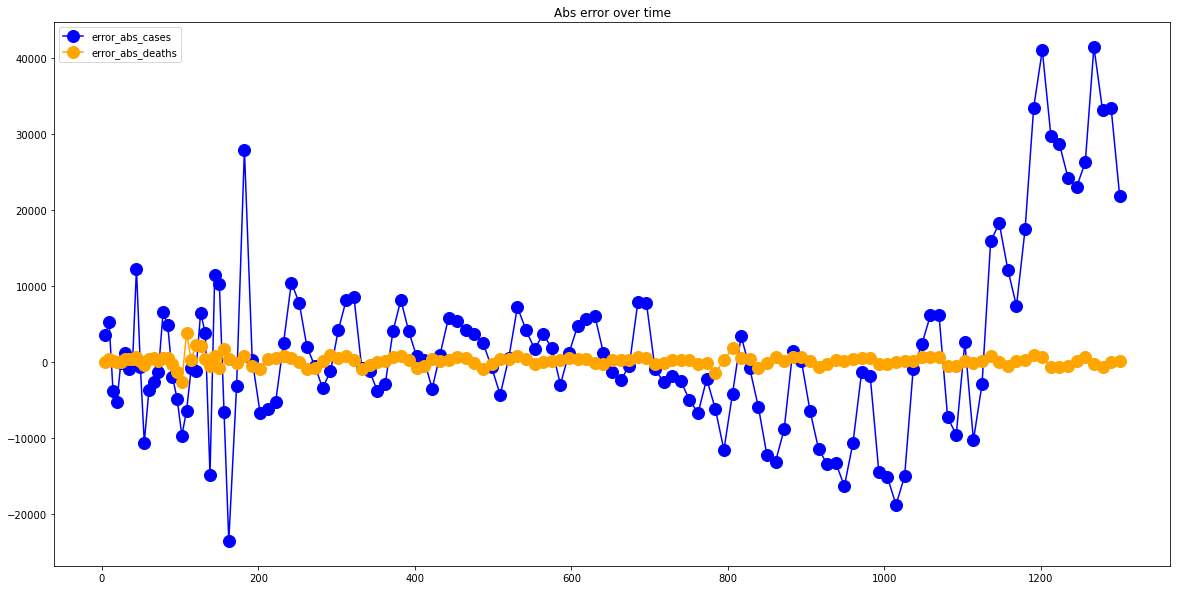

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  72.86666666666666
RMSE =  102.58976196121745
-- China performances for deaths --
MAE =  30.22222222222222
RMSE =  135.12962226993315


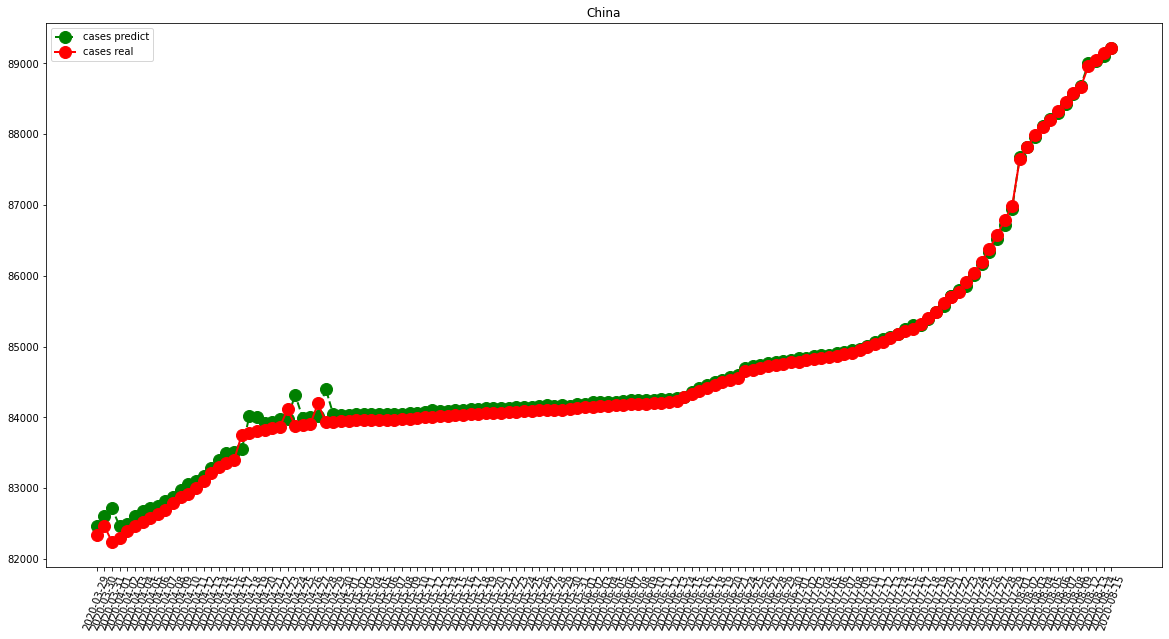

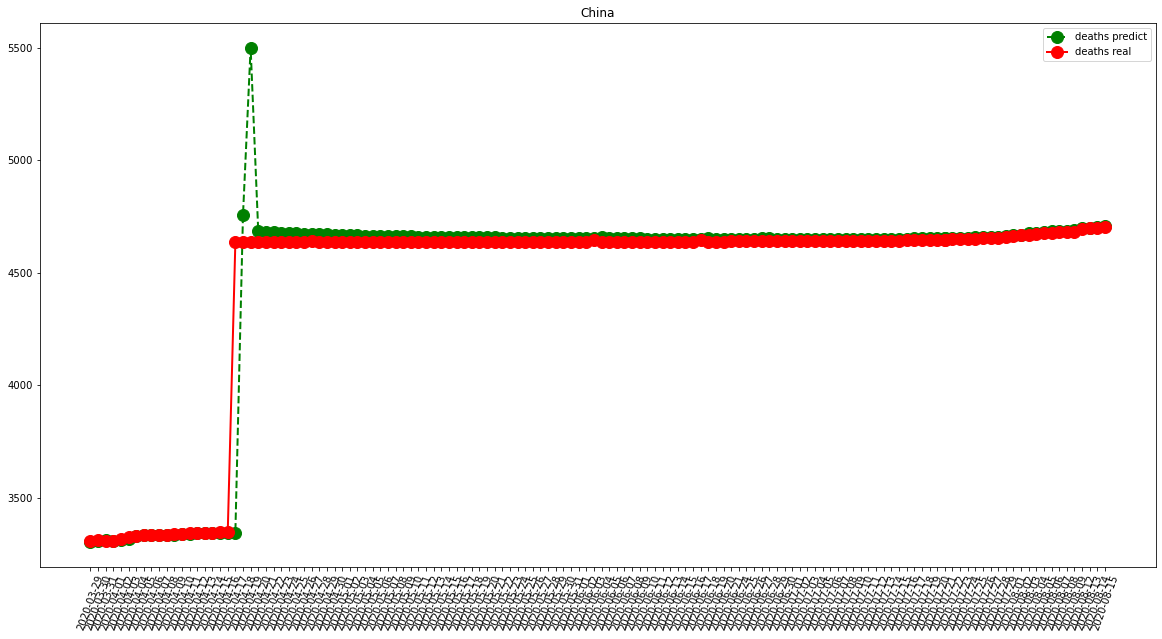

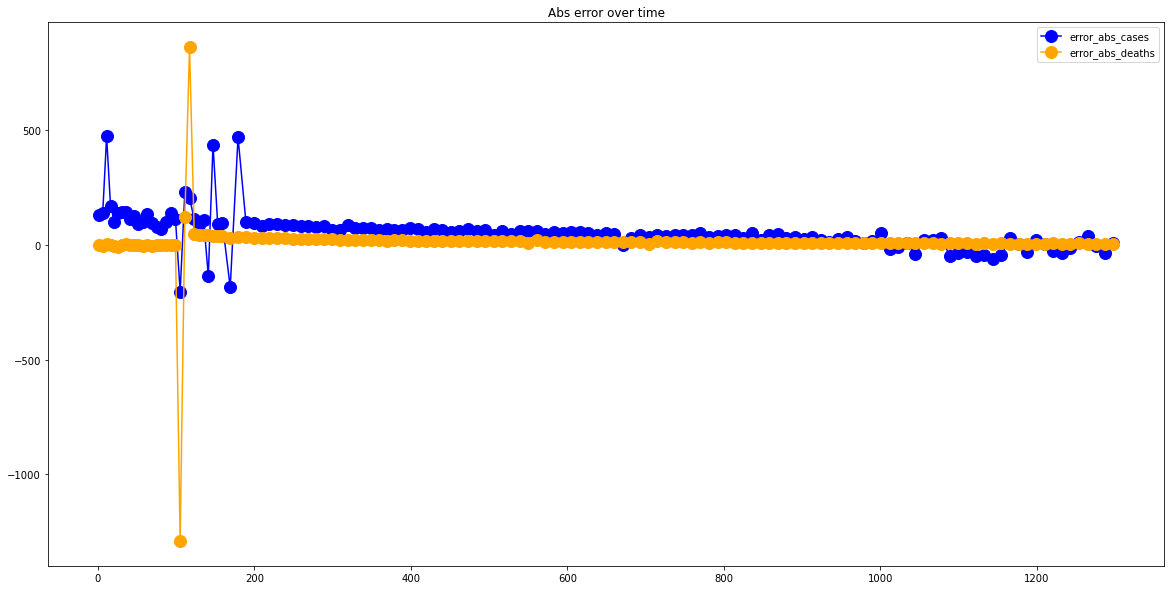

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1186.1401869158879
RMSE =  4039.224406211955
-- United Kingdom performances for deaths --
MAE =  237.19626168224298
RMSE =  716.484238173738


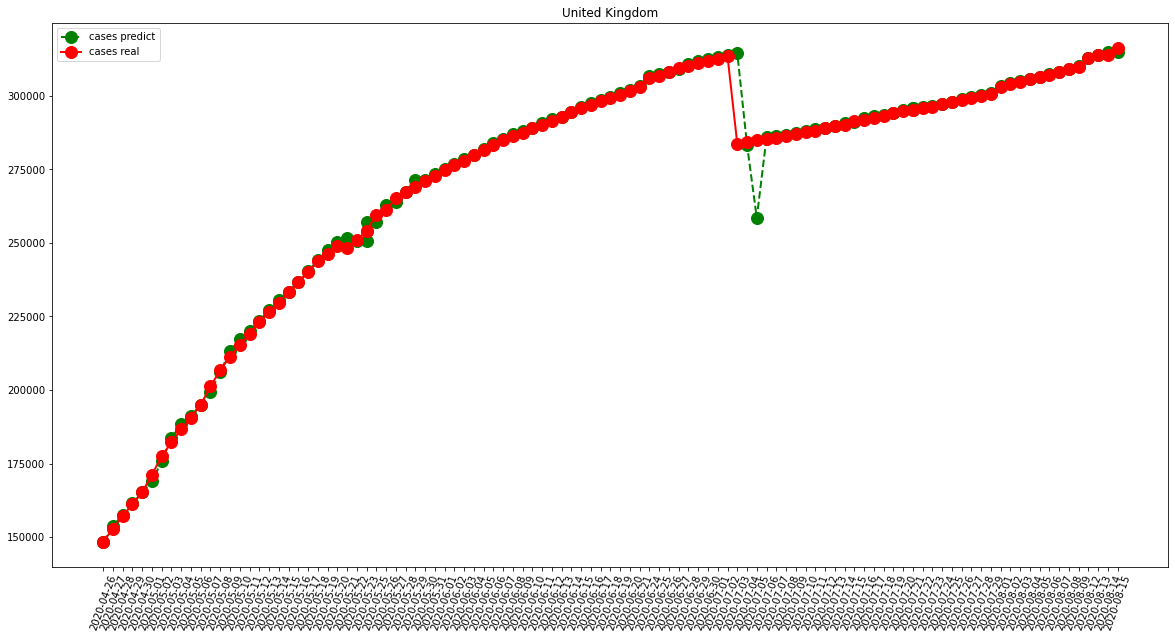

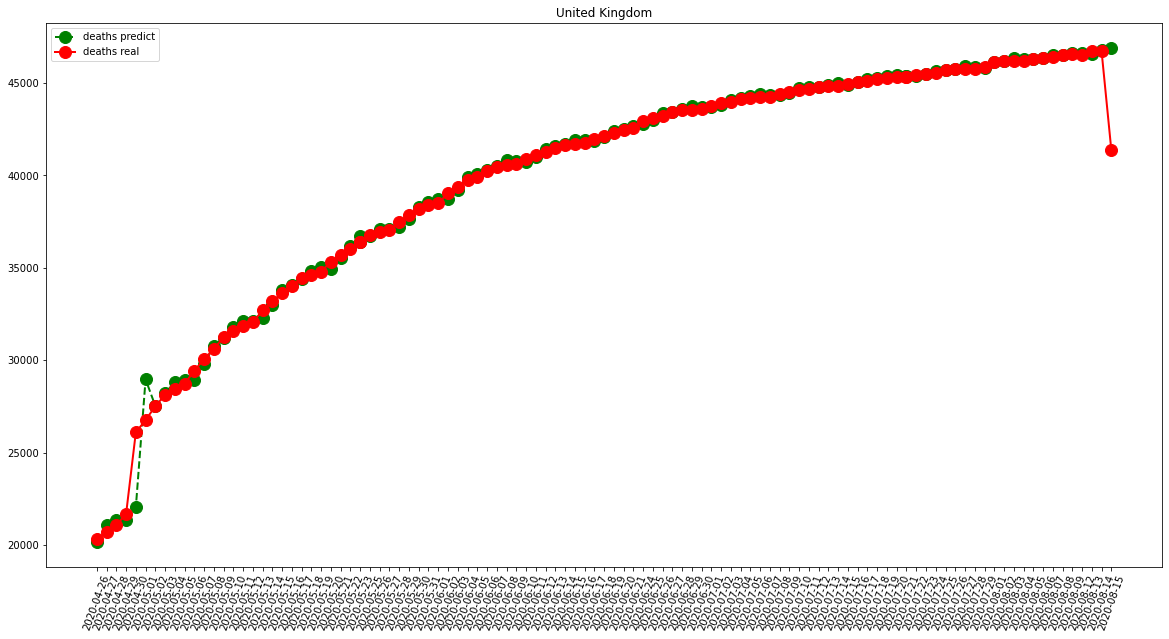

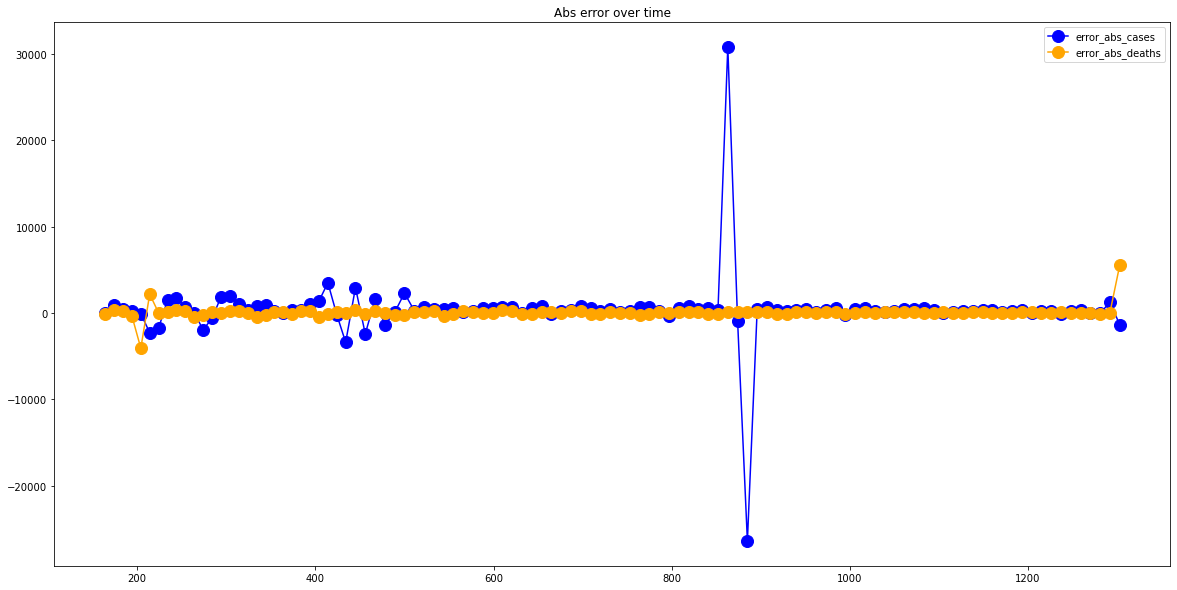

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  318.8785046728972
RMSE =  441.18553115123376
-- Germany performances for deaths --
MAE =  23.252336448598133
RMSE =  42.34769300450425


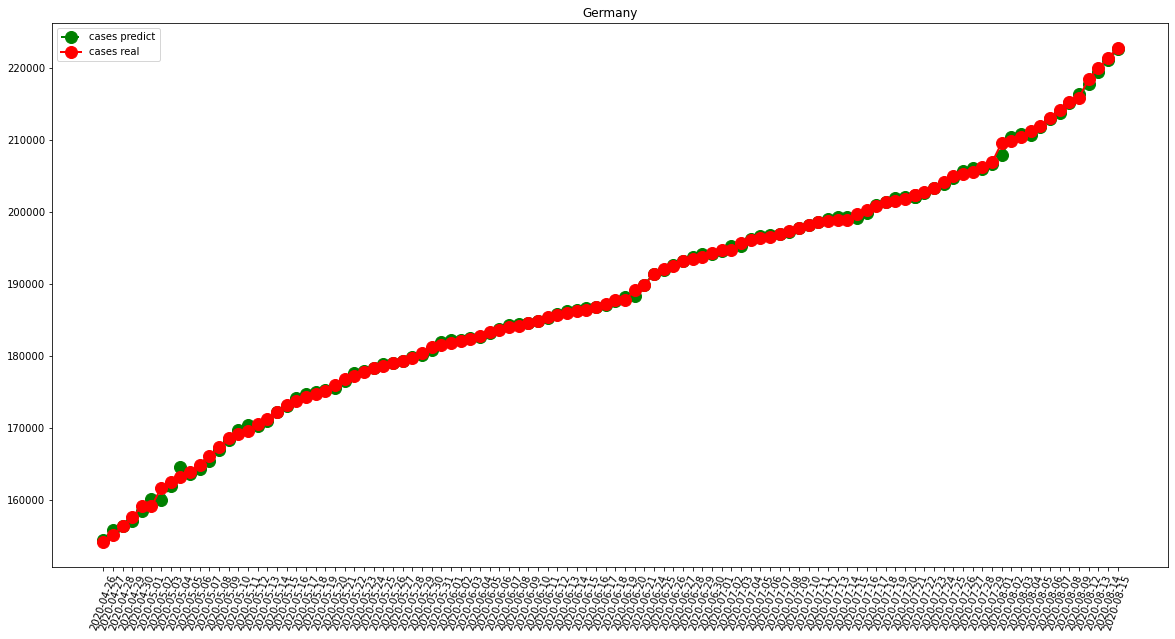

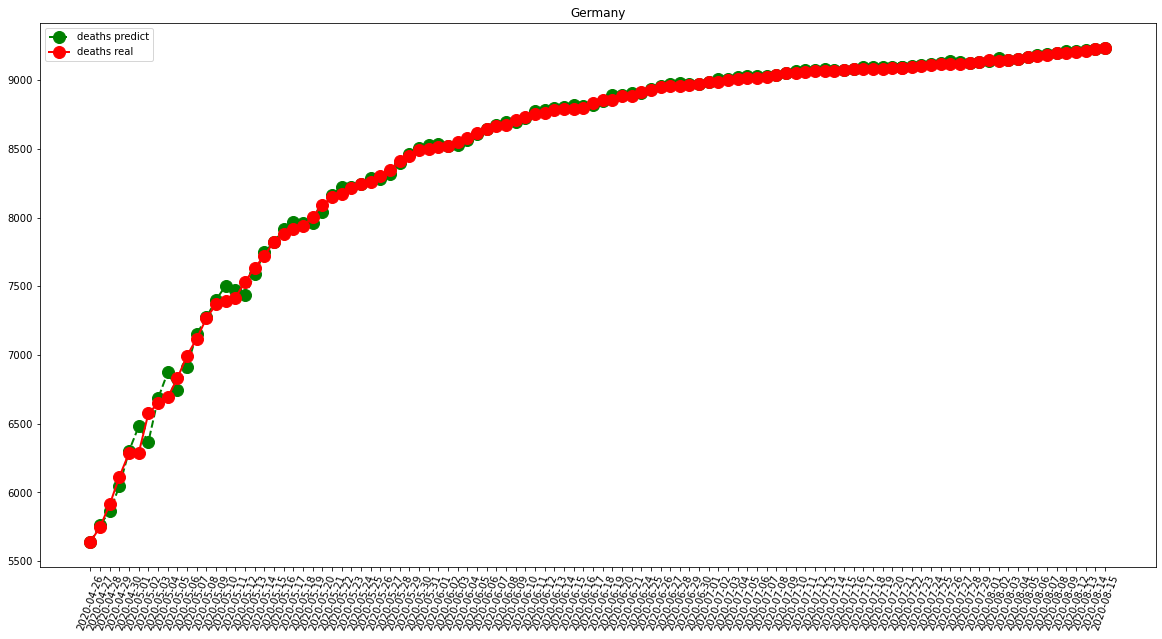

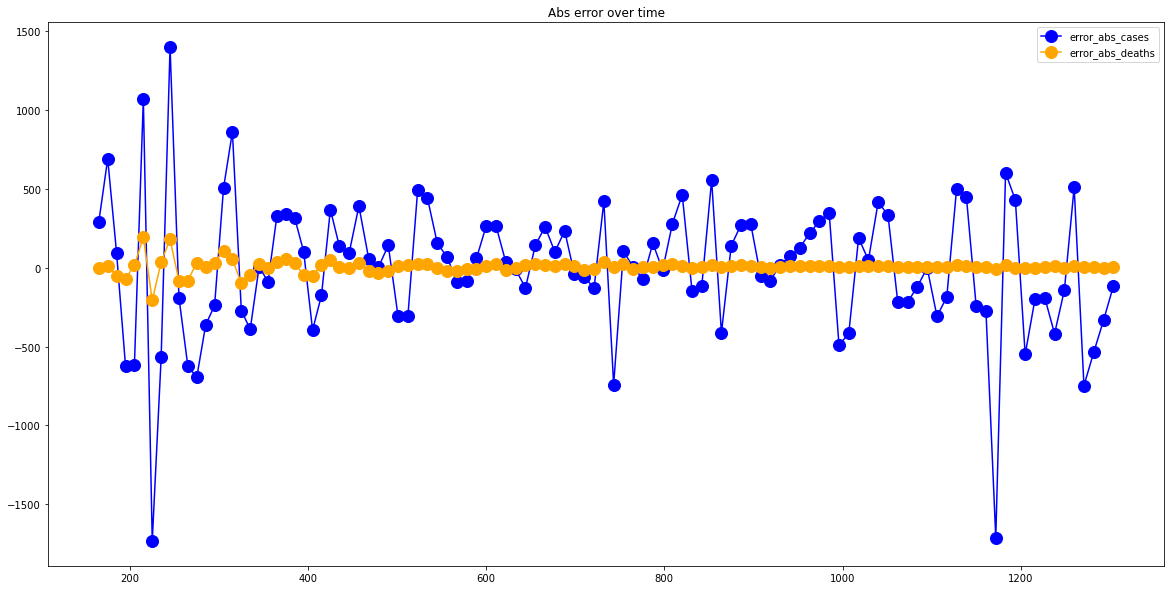

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  616.588785046729
RMSE =  911.6105036035806
-- Iran performances for deaths --
MAE =  32.570093457943926
RMSE =  69.7652271256093


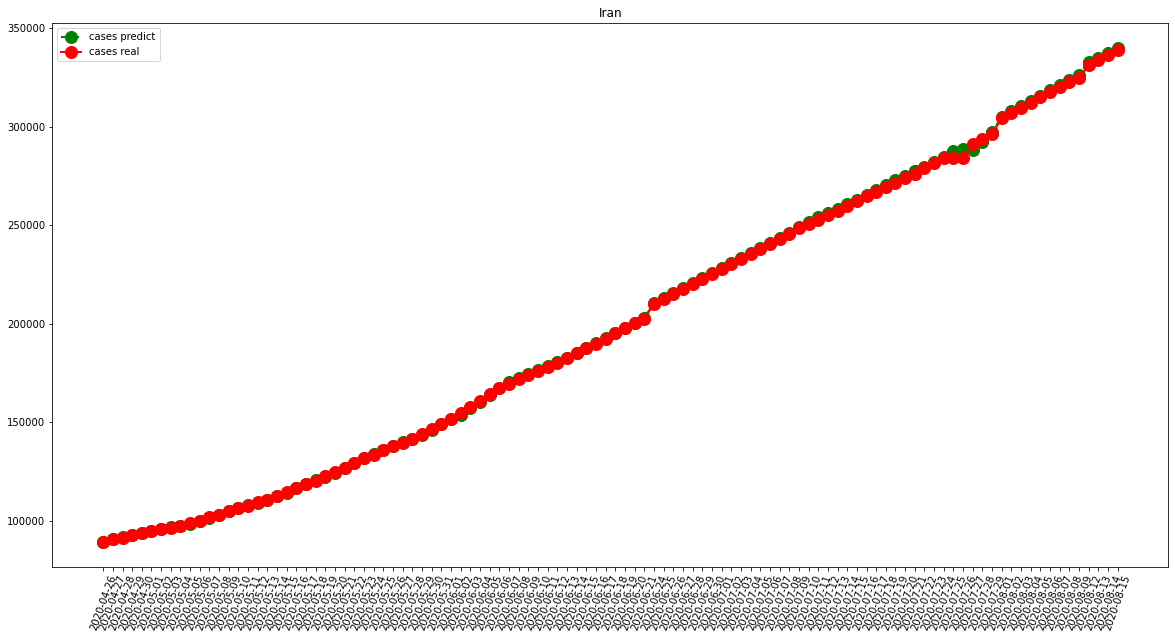

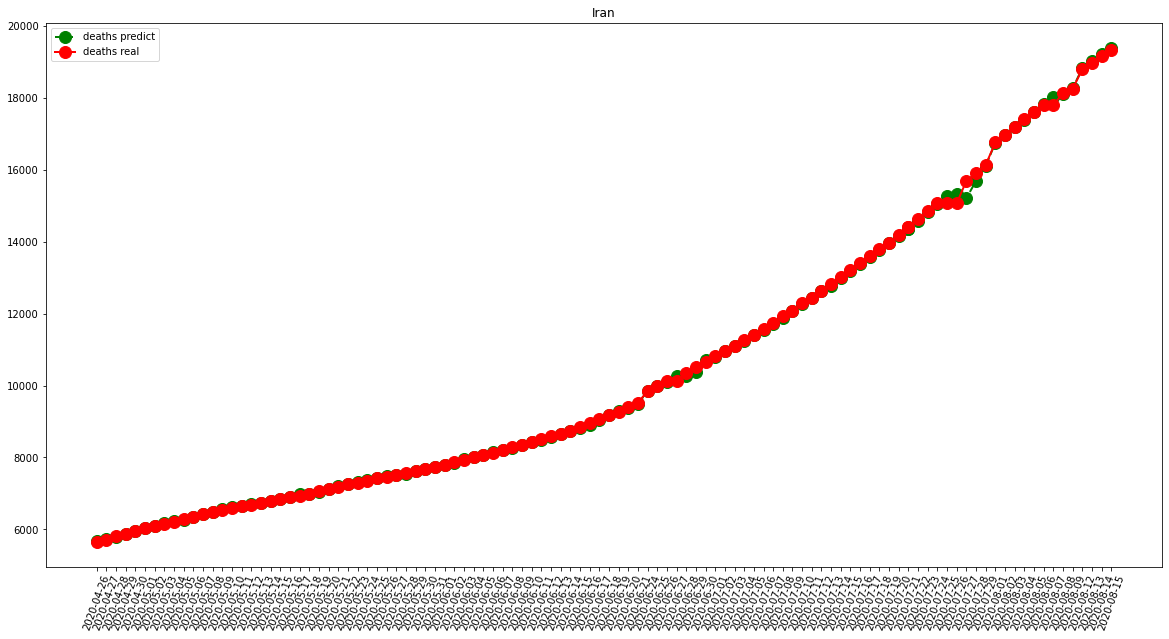

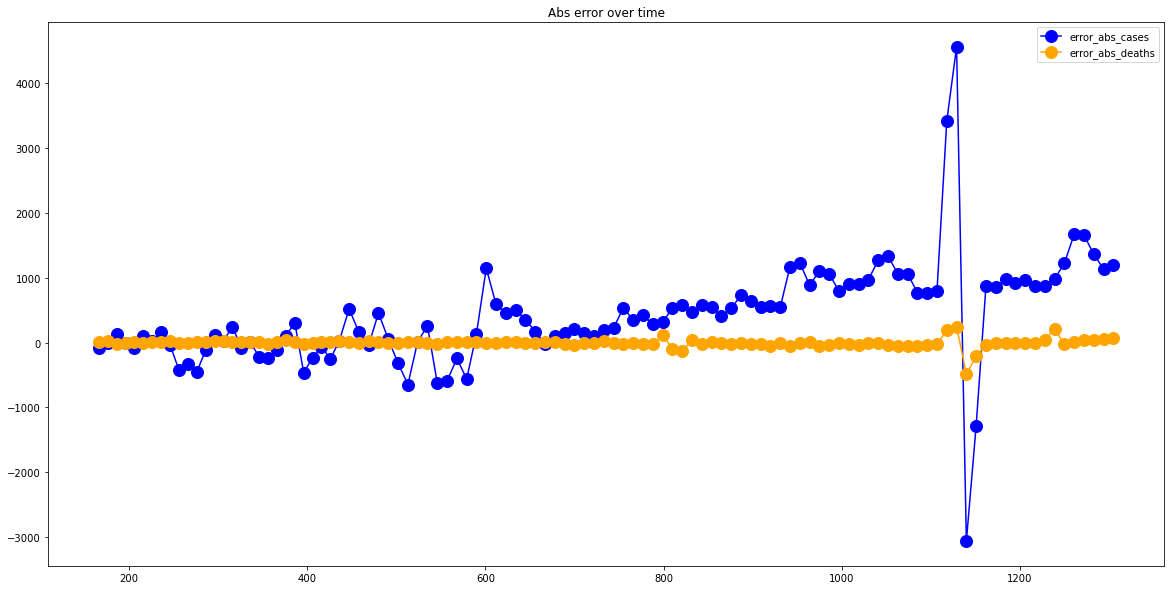

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  198.0467289719626
RMSE =  336.4341459772466
-- Turkey performances for deaths --
MAE =  17.981308411214954
RMSE =  98.14046770761365


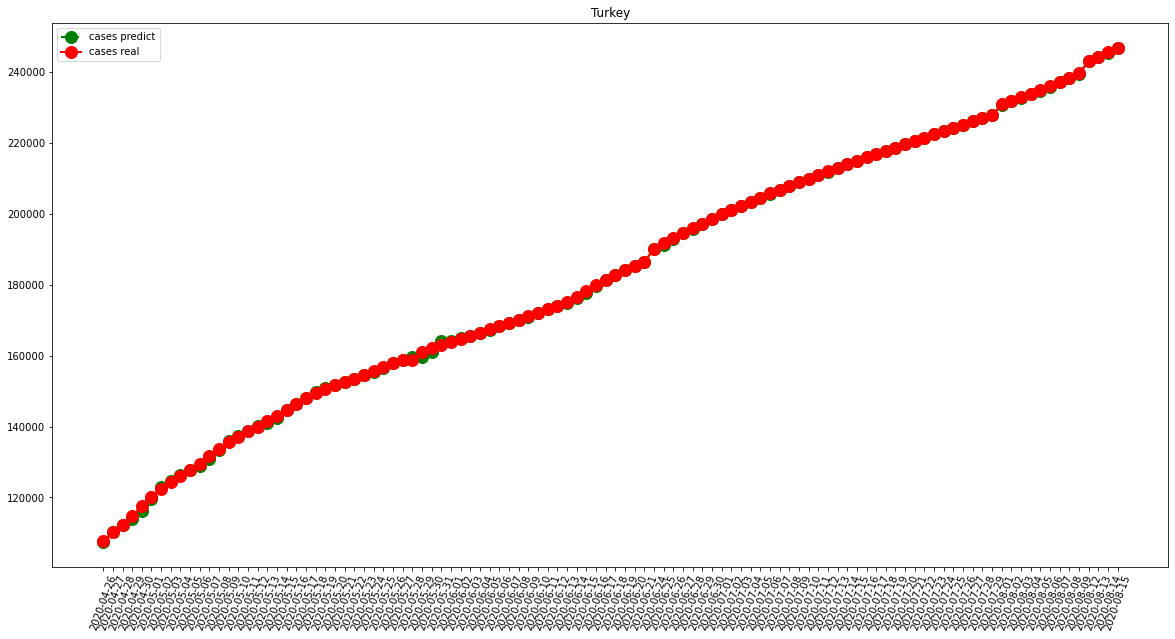

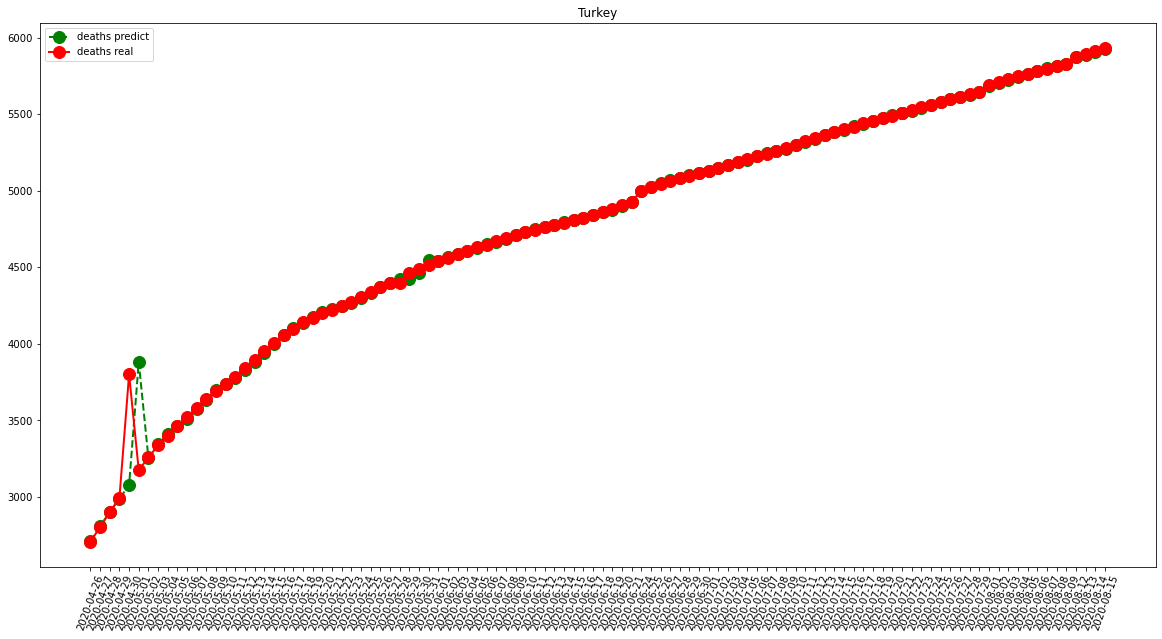

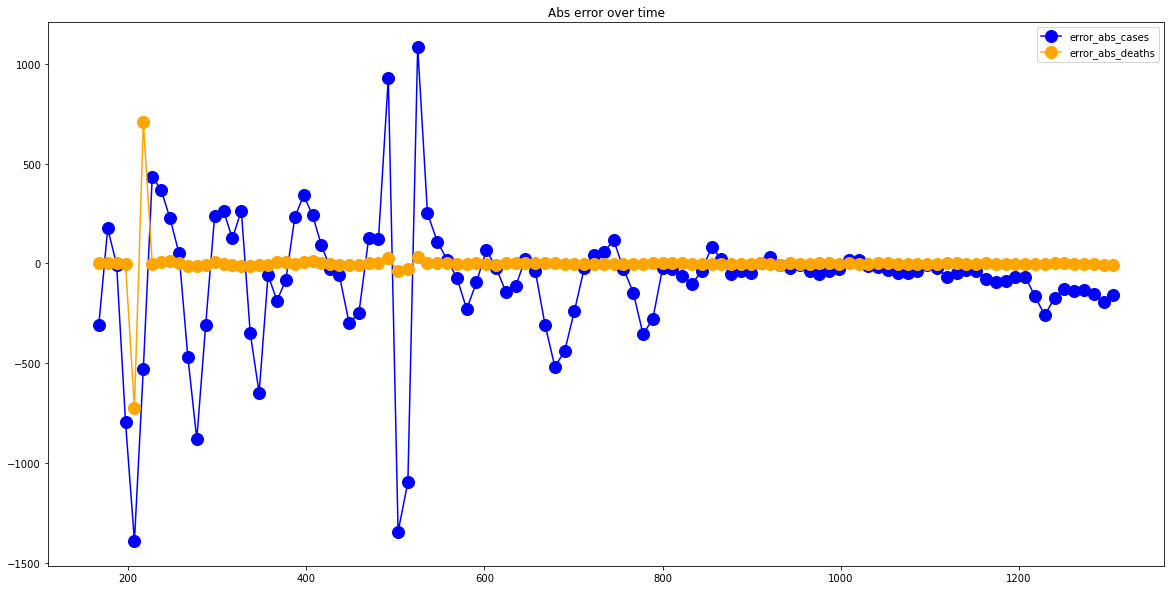

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  11628.525
RMSE =  15541.081553418346
-- Brazil performances for deaths --
MAE =  393.175
RMSE =  483.48663373458425


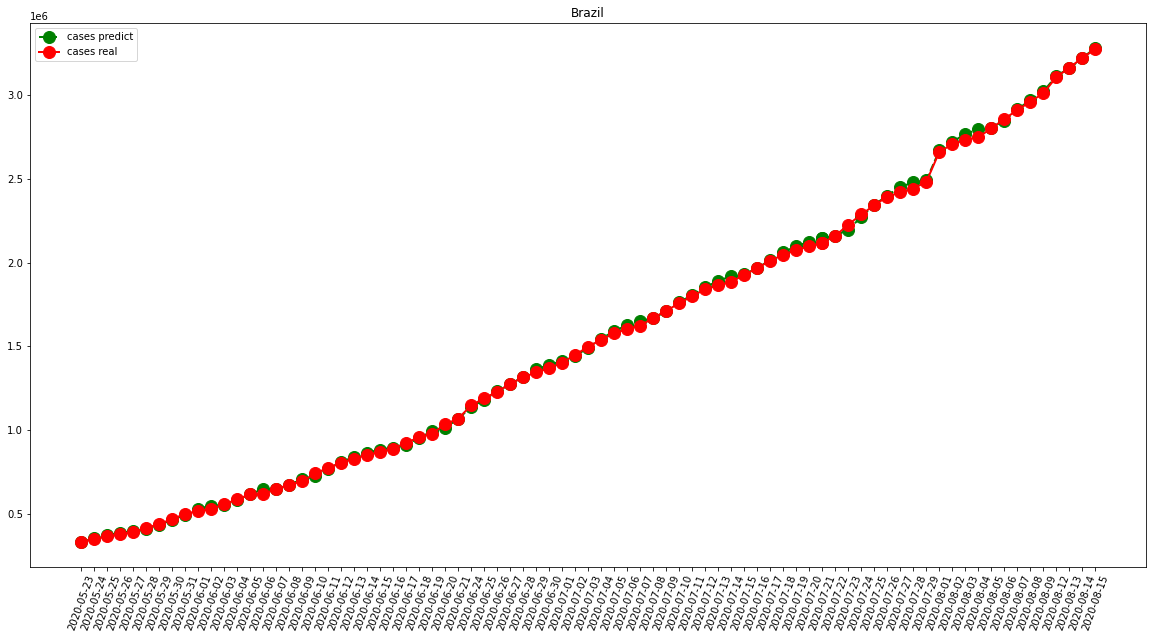

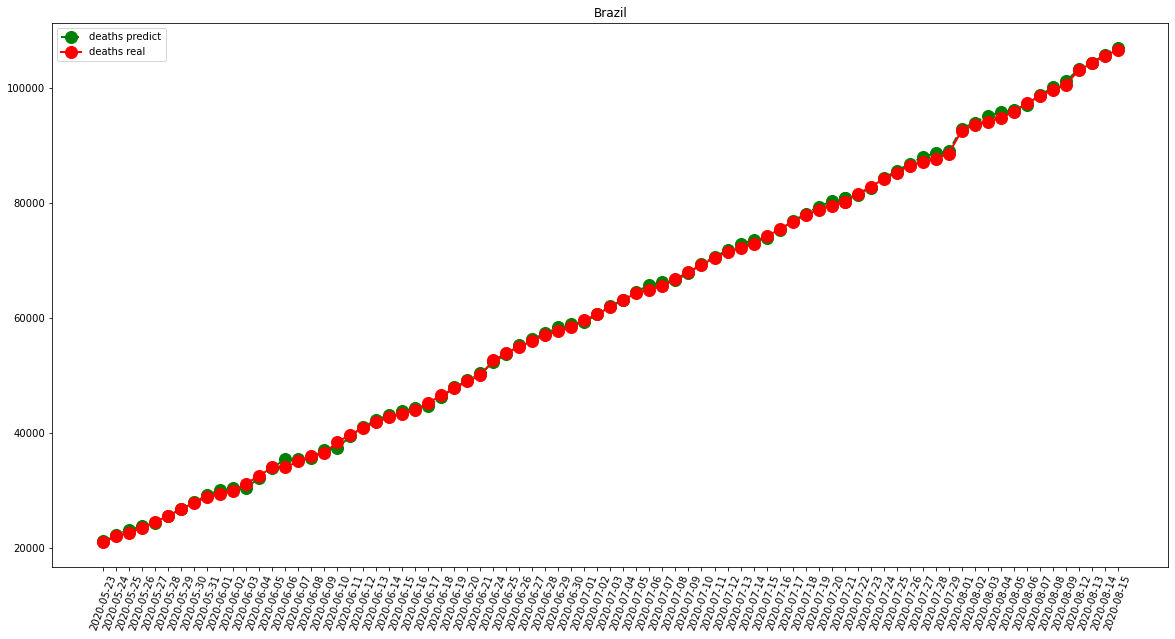

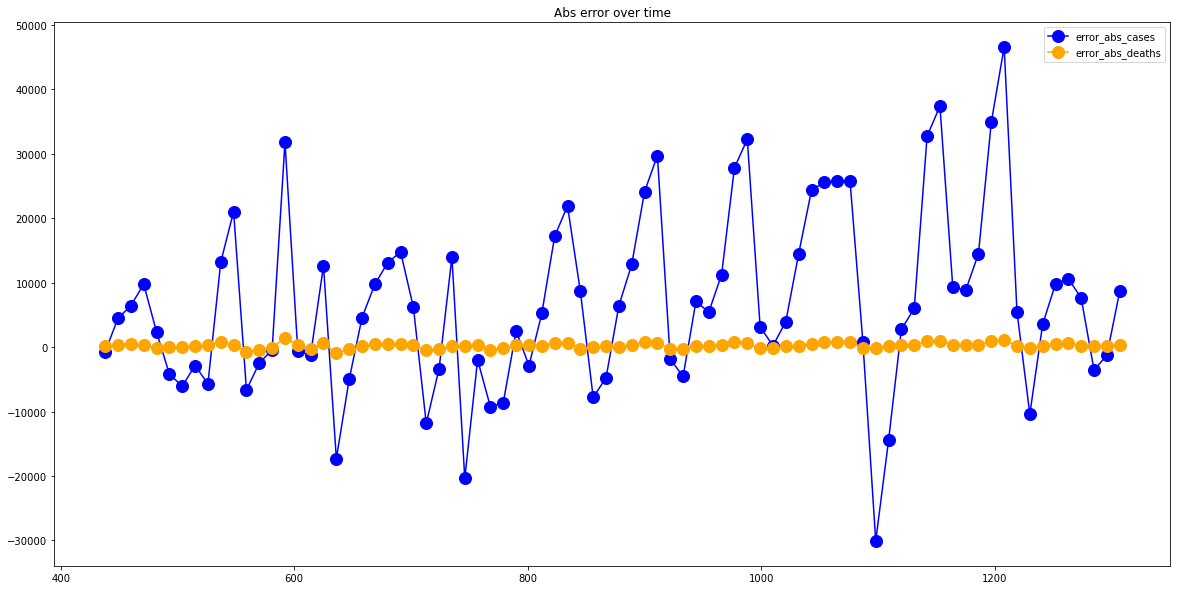

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)